### SQLite


+ Clustered versus Non Clustered indexing
+ Clustered indexing means ordering the table as according to primary key along with other columns. Non clustered indexing usually with Unique column and accompanying column is a reference column, referencing the original column.
+ MUL stands for MULTIPLE and it allows for multiple occurences of a value in the column.
+ show create
+ explain
+ Indexing becomes very expensive and increases time instead of decreasing it if applied to every column, since all the new tables generated for referencing make it expensive from memory standpoint, further if frequent insertions/deletions are done all the tables are affected.
+ sqlite3 and mysqlalchemy for importing sql files.
+ First step is to connect. So we have connect() to connect to database.
+ The connect file returns a connection object. If file doesn't exist the connect() function creates a file.
+ db.cursor() object helps execute sql commands.It helps point to table or row etc. on which the command is to be executed.
+ In sqlite we have Text for varchar and Real for double/float
+ commit() is a command to confirm in a way. So until we don't commit no insertions and deletions are made.
+ Transaction methodology is to be obeyed which is why we have commit to avoid inconsistencies.


In [1]:
import sqlite3
db = sqlite3.connect('School.sqlite')
db

In [3]:
cur = db.cursor()
cur

In [4]:
cur.execute('create table Student(RollNumber int,Name Text,Age int)')

In [5]:
cur.execute('Insert into Student values(101,"Aman",20)')

In [6]:
db.commit()

In [7]:
cur.execute('Select * from Student')

In [8]:
for i in cur:
    print(i)

(101, 'Aman', 20)


In [13]:
# Pandas and sqlite

db = sqlite3.connect(r'C:\Users\venug\Downloads\IMDB_Data\IMDB.sqlite')
db

In [40]:
import pandas as pd

data = pd.read_sql_query('Select * from sqlite_master',db)
data

,type,name,tbl_name,rootpage,sql
0,table,IMDB,IMDB,2,"CREATE TABLE IMDB (Movie_id Text, Title Text, ..."
1,table,earning,earning,43,"CREATE TABLE earning (Movie_id Text, Domestic ..."
2,table,genre,genre,45,"CREATE TABLE genre (Movie_id Text, genre Text)"


In [21]:
imdbData = pd.read_sql_query('Select * from IMDB',db)
imdbData.columns

Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')

In [41]:
imdbGenre = pd.read_sql_query('Select * from earning',db)
imdbGenre.columns

Index(['Movie_id', 'Domestic', 'Worldwide'], dtype='object')

In [23]:
imdbGenre[imdbGenre.genre=='Comedy']

,Movie_id,genre
2,37367,Comedy
3,49473,Comedy
9,25281,Comedy
15,31370,Comedy
30,49518,Comedy
51,31069,Comedy
57,30146,Comedy
58,13316,Comedy
74,17294,Comedy
75,41048,Comedy


In [25]:
imdbData.columns

Index(['Movie_id', 'Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget',
       'Runtime', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'VotesIMDB', 'Votes1000', 'VotesUS', 'VotesnUS'],
      dtype='object')

In [39]:
Rating = pd.read_sql_query('Select Rating,TotalVotes from IMDB where Rating>8',db)
print(format(Rating.TotalVotes.mean(),'.2f'))

626560.22


In [47]:
EarningRating = pd.read_sql_query('Select t.Rating,s.Domestic,s.Worldwide from IMDB as t JOIN earning as s ON t.Movie_id = s.Movie_id ',db)

EarningRating

,Rating,Domestic,Worldwide
0,8.1,56671993,1.877332e+08
1,7.6,18335230,6.073880e+07
2,7.7,35014192,3.918778e+07
3,7.8,15322921,8.710045e+07
4,7.9,6739492,1.983949e+07
5,7.7,136025503,2.323255e+08
6,8.0,100546139,2.033882e+08
7,7.9,8114627,1.117647e+07
8,7.8,222527828,6.578186e+08
9,7.8,42340598,1.032151e+08


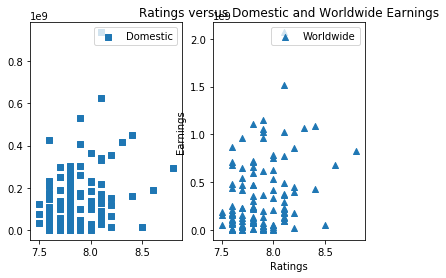

In [85]:
from matplotlib import pyplot as plt
#plt.plot(EarningRating['Rating'],EarningRating['Domestic'])
#ax = plt.subplots(2, 1, 1)
plt.subplot(1, 2, 1)
plt.scatter(EarningRating['Rating'],EarningRating['Domestic'],marker = 's',label = 'Domestic')
plt.legend(loc = 1)
plt.subplot(1, 2, 2)
plt.scatter(EarningRating['Rating'],EarningRating['Worldwide'],marker = '^',label = 'Worldwide')
plt.title('Ratings versus Domestic and Worldwide Earnings')
plt.legend(loc = 1)
plt.xlabel('Ratings')
plt.ylabel('Earnings')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [96]:
BudgetEarning = pd.read_sql_query('Select t.Movie_id,t.Budget,s.Worldwide from IMDB as t JOIN earning as s ON t.Movie_id = s.Movie_id ',db)

BudgetEarning.sort_values(by = ['Worldwide'],ascending = False,inplace = True)
s =BudgetEarning.Budget.iloc[0:5].mean()
t = BudgetEarning.head()
a = t['Budget'].mean()
s

233000000.0

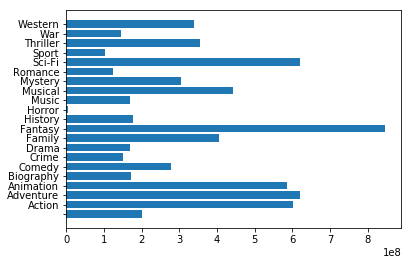

In [113]:
GenreEarning =pd.read_sql_query('Select m.Movie_id,m.genre,s.Worldwide from genre as m JOIN earning as s ON m.Movie_id = s.Movie_id ',db)
GenreEarning

g = GenreEarning.groupby(GenreEarning.genre).Worldwide.mean()
plt.barh(g.index,g.values)
plt.show()

In [139]:
GenreBudgetEarning = pd.read_sql_query('Select m.Movie_id,t.Budget,m.genre,s.Worldwide from genre as m JOIN earning as s ON m.Movie_id = s.Movie_id join imdb as t on t.Movie_id = s.Movie_id ',db)
#print(GenreBudgetEarning)

e = GenreBudgetEarning[['genre','Worldwide']].groupby('genre').Worldwide.mean()
b = GenreBudgetEarning[['genre','Budget']].groupby(GenreBudgetEarning.genre).Budget.mean()
#GenreBudgetEarning[['genre','Worldwide']]

DataError: No numeric types to aggregate